In [1]:
import os
from paths import *
from C_0E_allhidrep import *

In [4]:
eval_out_dir = os.path.join(model_save_, "eval-C_0E-0526172101")

In [18]:
for model_type in ["mtl"]: 
    for condition in ["u"]: 
        for model_num in [1]: 
            res_save_dir = os.path.join(eval_out_dir, model_type, condition, str(model_num))
            sil_scores_99 = []
            for epoch in range(1, 100): 
                sil_score_path = os.path.join(res_save_dir, f"sil_scores_{epoch}.pk")
                with open(sil_score_path, "rb") as file: 
                    sil_scores = pickle.load(file)
                sil_scores_99.append(sil_scores)

In [13]:
word_rec_dir = train_cut_word_
valid_guide_path = os.path.join(src_, "guide_validation.csv")
single_loader = load_data_general(ThisDataset, 
                                    word_rec_dir, valid_guide_path, load="valid", select=0.3, sampled=False, 
                                    batch_size=1)

# Prepare guide file for hidrep evaluation        
included_names = get_included_names(single_loader)
# read in guide file
guide_file = pd.read_csv(valid_guide_path)
# filtering out is not necessary, since we only include wuid for encoded words
guide_file = guide_file[~guide_file["segment_nostress"].isin(["sil", "sp", "spn"])]
filtered_df = guide_file[guide_file['wuid'].isin(included_names)].copy()
filtered_df["startFrame"] = filtered_df.apply(lambda x: time_to_frame(x['startTime'] - x['word_startTime']), axis=1)
filtered_df["endFrame"] = filtered_df.apply(lambda x: time_to_frame(x['endTime'] - x['word_startTime']), axis=1)
name_dict = {token: index for index, token in enumerate(included_names)}

all_v = filtered_df[filtered_df["segment_nostress"].isin(ARPABET.list_vowels())]["segment_nostress"].unique().tolist()
full_hidrep_evaluate_list = list(combinations(all_v, 2))

In [19]:
full_hidrep_evaluate_list

[('IH', 'EY'),
 ('IH', 'IY'),
 ('IH', 'AE'),
 ('IH', 'OW'),
 ('IH', 'UH'),
 ('IH', 'AO'),
 ('IH', 'UW'),
 ('IH', 'AA'),
 ('IH', 'AY'),
 ('IH', 'AW'),
 ('IH', 'EH'),
 ('IH', 'ER'),
 ('IH', 'OY'),
 ('EY', 'IY'),
 ('EY', 'AE'),
 ('EY', 'OW'),
 ('EY', 'UH'),
 ('EY', 'AO'),
 ('EY', 'UW'),
 ('EY', 'AA'),
 ('EY', 'AY'),
 ('EY', 'AW'),
 ('EY', 'EH'),
 ('EY', 'ER'),
 ('EY', 'OY'),
 ('IY', 'AE'),
 ('IY', 'OW'),
 ('IY', 'UH'),
 ('IY', 'AO'),
 ('IY', 'UW'),
 ('IY', 'AA'),
 ('IY', 'AY'),
 ('IY', 'AW'),
 ('IY', 'EH'),
 ('IY', 'ER'),
 ('IY', 'OY'),
 ('AE', 'OW'),
 ('AE', 'UH'),
 ('AE', 'AO'),
 ('AE', 'UW'),
 ('AE', 'AA'),
 ('AE', 'AY'),
 ('AE', 'AW'),
 ('AE', 'EH'),
 ('AE', 'ER'),
 ('AE', 'OY'),
 ('OW', 'UH'),
 ('OW', 'AO'),
 ('OW', 'UW'),
 ('OW', 'AA'),
 ('OW', 'AY'),
 ('OW', 'AW'),
 ('OW', 'EH'),
 ('OW', 'ER'),
 ('OW', 'OY'),
 ('UH', 'AO'),
 ('UH', 'UW'),
 ('UH', 'AA'),
 ('UH', 'AY'),
 ('UH', 'AW'),
 ('UH', 'EH'),
 ('UH', 'ER'),
 ('UH', 'OY'),
 ('AO', 'UW'),
 ('AO', 'AA'),
 ('AO', 'AY'),
 ('AO', 'A

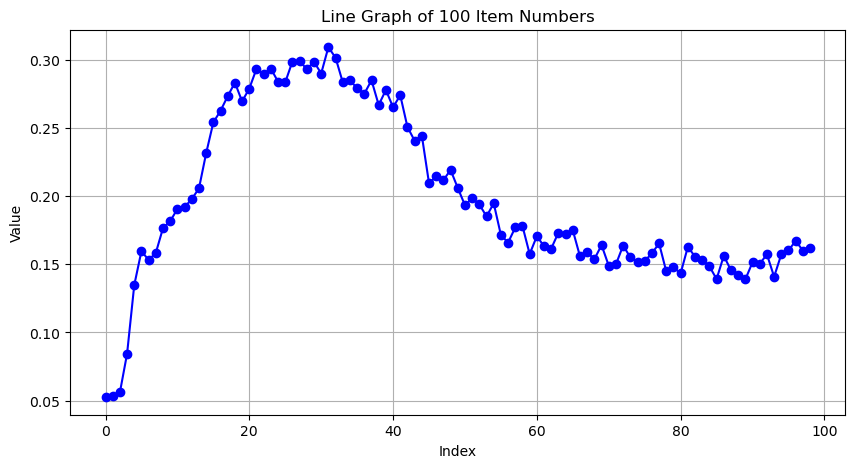

In [21]:
data = [sil[3] for sil in sil_scores_99]

plt.figure(figsize=(10, 5))
plt.plot(data, marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('Line Graph of 100 Item Numbers')
plt.xlabel('Index')
plt.ylabel('Value')

# Show the graph
plt.grid(True)
plt.show()

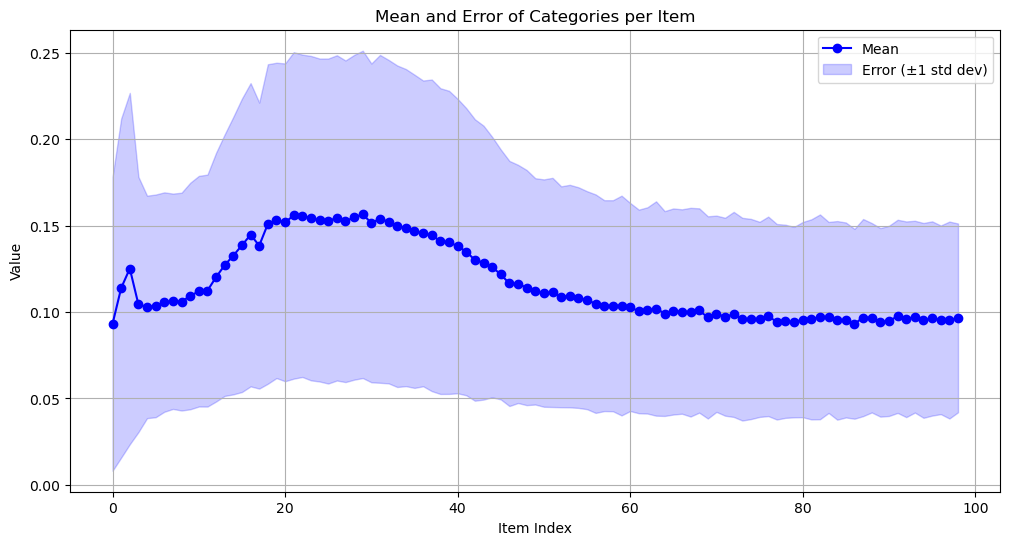

: 

In [23]:
data = np.array(sil_scores_99)

# Calculate the mean and standard deviation for each item
means = np.mean(data, axis=1)
std_devs = np.std(data, axis=1)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the mean
plt.plot(means, marker='o', linestyle='-', color='b', label='Mean')

# Plot the error as a shaded area
plt.fill_between(range(len(means)), means - std_devs, means + std_devs, color='b', alpha=0.2, label='Error (±1 std dev)')

# Add title and labels
plt.title('Mean and Error of Categories per Item')
plt.xlabel('Item Index')
plt.ylabel('Value')
plt.legend()

# Show the graph
plt.grid(True)
plt.show()

In [16]:
full_hidrep_evaluate_list

[('IH', 'EY'),
 ('IH', 'IY'),
 ('IH', 'AE'),
 ('IH', 'OW'),
 ('IH', 'UH'),
 ('IH', 'AO'),
 ('IH', 'UW'),
 ('IH', 'AA'),
 ('IH', 'AY'),
 ('IH', 'AW'),
 ('IH', 'EH'),
 ('IH', 'ER'),
 ('IH', 'OY'),
 ('EY', 'IY'),
 ('EY', 'AE'),
 ('EY', 'OW'),
 ('EY', 'UH'),
 ('EY', 'AO'),
 ('EY', 'UW'),
 ('EY', 'AA'),
 ('EY', 'AY'),
 ('EY', 'AW'),
 ('EY', 'EH'),
 ('EY', 'ER'),
 ('EY', 'OY'),
 ('IY', 'AE'),
 ('IY', 'OW'),
 ('IY', 'UH'),
 ('IY', 'AO'),
 ('IY', 'UW'),
 ('IY', 'AA'),
 ('IY', 'AY'),
 ('IY', 'AW'),
 ('IY', 'EH'),
 ('IY', 'ER'),
 ('IY', 'OY'),
 ('AE', 'OW'),
 ('AE', 'UH'),
 ('AE', 'AO'),
 ('AE', 'UW'),
 ('AE', 'AA'),
 ('AE', 'AY'),
 ('AE', 'AW'),
 ('AE', 'EH'),
 ('AE', 'ER'),
 ('AE', 'OY'),
 ('OW', 'UH'),
 ('OW', 'AO'),
 ('OW', 'UW'),
 ('OW', 'AA'),
 ('OW', 'AY'),
 ('OW', 'AW'),
 ('OW', 'EH'),
 ('OW', 'ER'),
 ('OW', 'OY'),
 ('UH', 'AO'),
 ('UH', 'UW'),
 ('UH', 'AA'),
 ('UH', 'AY'),
 ('UH', 'AW'),
 ('UH', 'EH'),
 ('UH', 'ER'),
 ('UH', 'OY'),
 ('AO', 'UW'),
 ('AO', 'AA'),
 ('AO', 'AY'),
 ('AO', 'A

# PP only

In [17]:
eval_out_dir = os.path.join(model_save_, "eval-C_0E-0527123053")

In [20]:
for model_type in ["pp"]: 
    for condition in ["u"]: 
        for model_num in [1]: 
            res_save_dir = os.path.join(eval_out_dir, model_type, condition, str(model_num))
            sil_scores_99 = []
            for epoch in range(0, 100): 
                sil_score_path = os.path.join(res_save_dir, f"sil_scores_{epoch}.pk")
                with open(sil_score_path, "rb") as file: 
                    sil_scores = pickle.load(file)
                sil_scores_99.append(sil_scores)

In [21]:
word_rec_dir = train_cut_word_
valid_guide_path = os.path.join(src_, "guide_validation.csv")
single_loader = load_data_general(ThisDataset, 
                                    word_rec_dir, valid_guide_path, load="valid", select=0.3, sampled=False, 
                                    batch_size=1)

# Prepare guide file for hidrep evaluation        
included_names = get_included_names(single_loader)
# read in guide file
guide_file = pd.read_csv(valid_guide_path)
# filtering out is not necessary, since we only include wuid for encoded words
guide_file = guide_file[~guide_file["segment_nostress"].isin(["sil", "sp", "spn"])]
filtered_df = guide_file[guide_file['wuid'].isin(included_names)].copy()
filtered_df["startFrame"] = filtered_df.apply(lambda x: time_to_frame(x['startTime'] - x['word_startTime']), axis=1)
filtered_df["endFrame"] = filtered_df.apply(lambda x: time_to_frame(x['endTime'] - x['word_startTime']), axis=1)
name_dict = {token: index for index, token in enumerate(included_names)}

all_v = filtered_df[filtered_df["segment_nostress"].isin(ARPABET.list_vowels())]["segment_nostress"].unique().tolist()
full_hidrep_evaluate_list = list(combinations(all_v, 2))

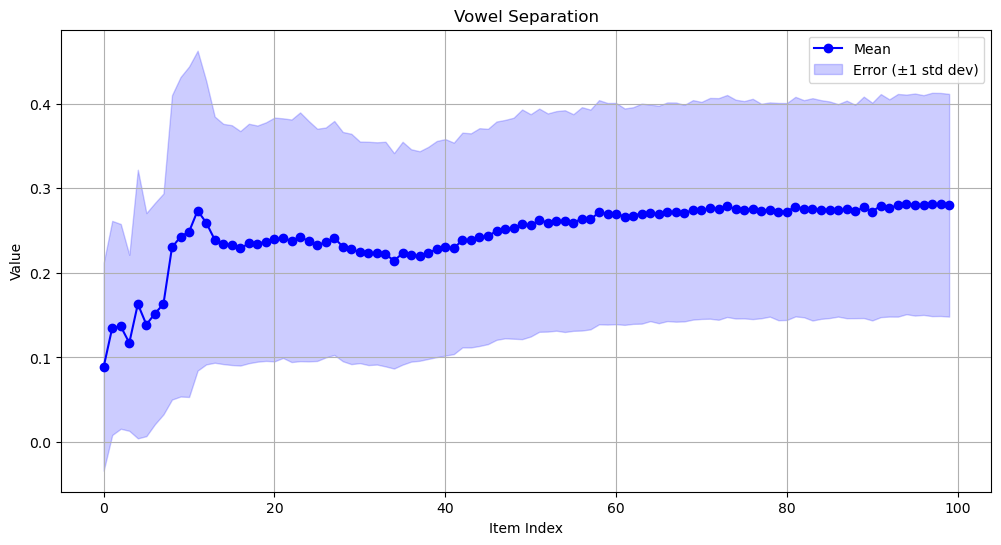

: 

In [22]:
data = np.array(sil_scores_99)

# Calculate the mean and standard deviation for each item
means = np.mean(data, axis=1)
std_devs = np.std(data, axis=1)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the mean
plt.plot(means, marker='o', linestyle='-', color='b', label='Mean')

# Plot the error as a shaded area
plt.fill_between(range(len(means)), means - std_devs, means + std_devs, color='b', alpha=0.2, label='Error (±1 std dev)')

# Add title and labels
plt.title('Vowel Separation')
plt.xlabel('Item Index')
plt.ylabel('Value')
plt.legend()

# Show the graph
plt.grid(True)
plt.show()

# Five runs

In [2]:
eval_out_dir = os.path.join(model_save_, "eval-C_0E-0527172800")

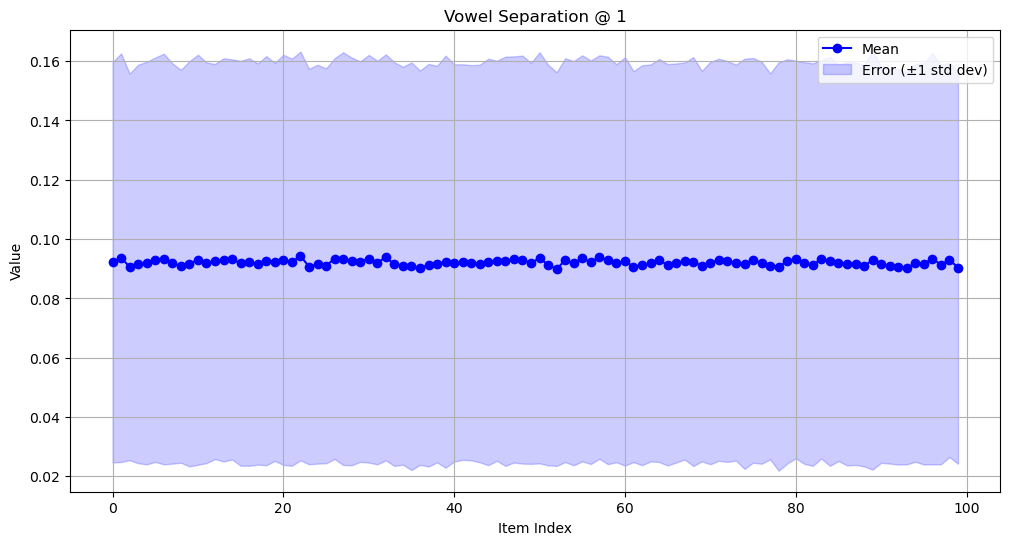

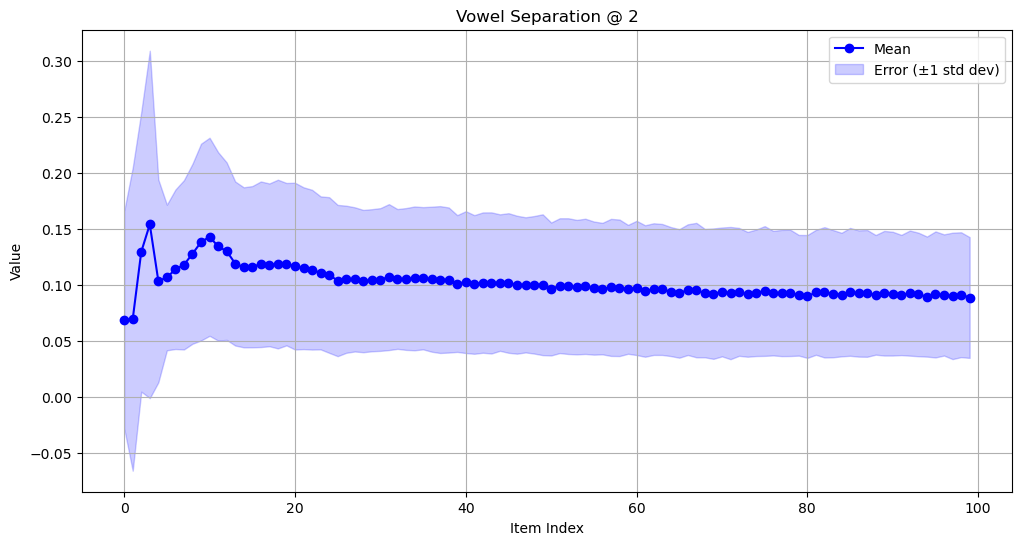

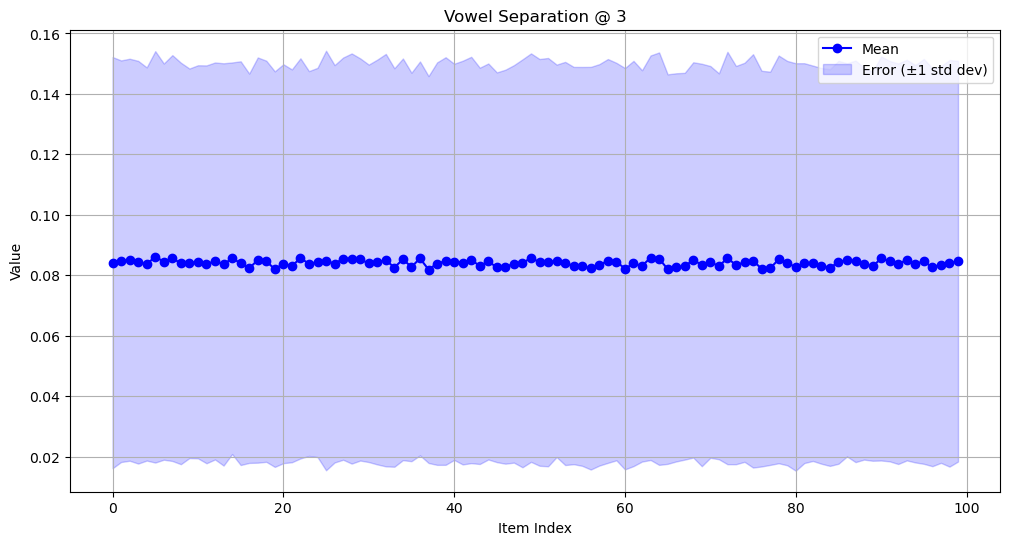

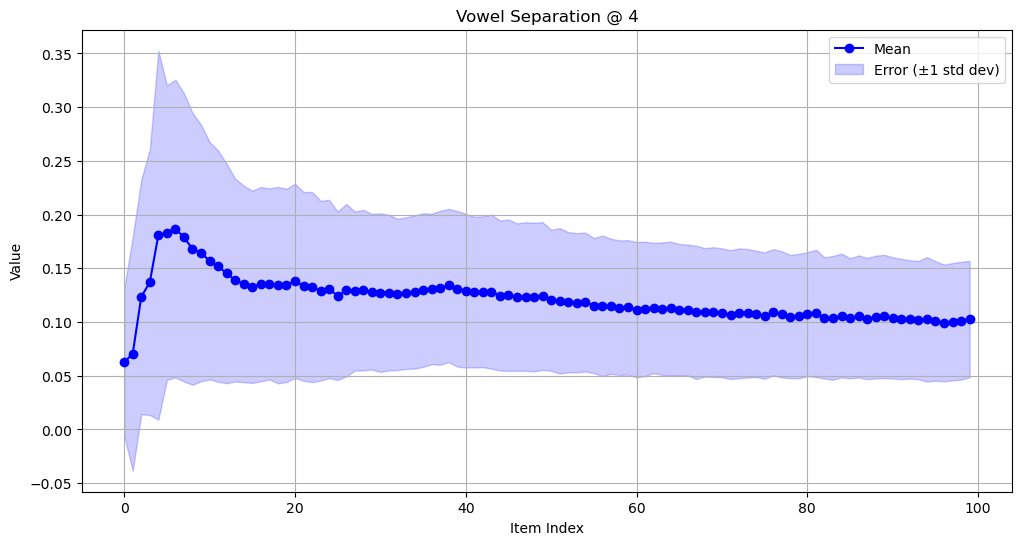

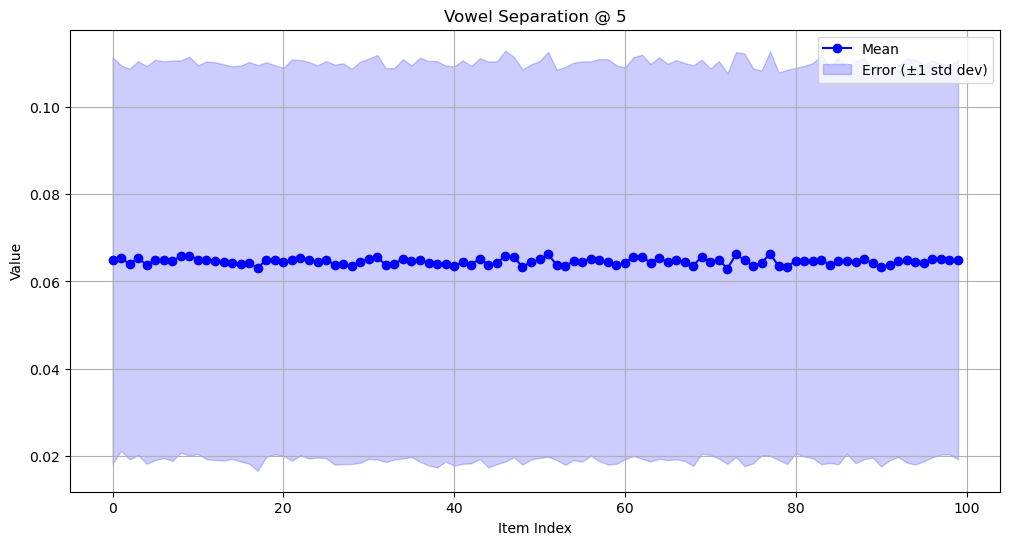

In [4]:
for model_type in ["mtl"]: 
    for condition in ["u"]: 
        for model_num in [1, 2, 3, 4, 5]: 
            res_save_dir = os.path.join(eval_out_dir, model_type, condition, str(model_num))
            sil_scores_99 = []
            for epoch in range(0, 100): 
                sil_score_path = os.path.join(res_save_dir, f"sil_scores_{epoch}.pk")
                with open(sil_score_path, "rb") as file: 
                    sil_scores = pickle.load(file)
                sil_scores_99.append(sil_scores)

            data = np.array(sil_scores_99)

            # Calculate the mean and standard deviation for each item
            means = np.mean(data, axis=1)
            std_devs = np.std(data, axis=1)

            # Create the plot
            plt.figure(figsize=(12, 6))

            # Plot the mean
            plt.plot(means, marker='o', linestyle='-', color='b', label='Mean')

            # Plot the error as a shaded area
            plt.fill_between(range(len(means)), means - std_devs, means + std_devs, color='b', alpha=0.2, label='Error (±1 std dev)')

            # Add title and labels
            plt.title(f'Vowel Separation @ {model_num}')
            plt.xlabel('Item Index')
            plt.ylabel('Value')
            plt.legend()

            # Show the graph
            plt.grid(True)
            plt.show()